# Questions of the Task:

## 1- Which techniques you have used while cleaning the data if you have cleaned it?
* I use some of basic `NLP` techniques for cleaning data by NLTk lib like remove stopwords and Tokenization and string lib for test preprocessing


## 2- How does your model work?
* My model works as making some Algorithms/functions for recommendation system and before it we needed to clean data after that have two clean columns clean_title and clean_text and clean the input by the same function used.

* For made the recommendation system we need a lot of data like 1 million row data at least, so that need to seeking for naive algorithms that will work in a small data, so after searching for text similarity metrics i reached to the simplist one is the `Jaccard Similarity` that takes two queries and returns the similarity between them.

*  After that, we need to make a list of tuples that contain the similarities between the clean_title columns of the given query and the indices of the clean_title,  and sort the list as a decreasing order for making things easy to get the highest similarity for queries.

* Iterate over the list of the tuple and save the indices on list_of_indices, and Iterate over the list_of_indices and make a list_of_titles that contains each row cell of job function of the specific index, and printing the titles 



## 3- Why have you chosen this approach?

* First i work on the data by building Machine Learning Multi-Class Classifier Algorithm and it didn't work, because we have small data, so that i turned into another approach is a `Jaccard Similarity` for Text Similarity

## 4- How can you extend the model to have better performance?
* If i have a plenty of data will use Nural Network for bulid multi-class classification or build another approch by NLP 

## 5- How do you evaluate your model?
* I didn't use any Machine Learning Algorithm because small data that we have and the evaluation will be a bad score.
* On the other hand, this task is like mapping between the input and the output and didn't need to make an evaluation 

## 6- What are the limitations of your methodology or where does your approach fail? 

*  This model has a limitation of prediction because the small data that we have

# Part 2 : belong the Flask API
* this code doesn't work on Jupyter notebook, but `work will in Spyder`.

In [ ]:
# # Import Necessary Libraries

# import pandas as pd
# import numpy as np
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import pairwise_distances

# import matplotlib.pyplot as plt
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer as ps
# from nltk import WordNetLemmatizer as wn

# from nltk.tokenize import sent_tokenize , word_tokenize
# import string
# import re

# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import pairwise_distances

# from flask import Flask, jsonify, request
# import sklearn.externals.joblib as jb

# #############################################################

# data = pd.read_csv('jobs_data.csv', index_col = 0)
# data = data.drop(['industry'], axis = 1) # removing useless features 
# # data = data.drop(['Unnamed: 0', 'industry'], axis = 1) # removing useless features 
# data.head()

# #############################################################

# # what is the shape of the dataset?
# print('the data has {} rows and has {} cols'.format(len(data) , len(data.columns)))

# #############################################################


# unduplicata_data = data.drop_duplicates(subset='title')
# unduplicata_data.shape

# #############################################################


# stopwords = nltk.corpus.stopwords.words('english')
# stopwords[:5]

# #############################################################

# # function for make some of NLP functions

# # this func for title 

# def clean_text_without_splitting(text):
#     text = re.sub("[^A-Za-z]", " ", text.strip())                              # Remove non english words
#     text = "".join([word for word in text if word not in string.punctuation]) # Removing puncituation
#     tokenize = re.split('\W+' , text)                                        # Tokenization    
#     text = [word.lower() for word in tokenize if word not in stopwords]     # Removing stopwords , lower case
#     text = [word for word in text if len(word)]                            # Remove the empty string
#     text = " ".join(word for word in text)                                # Make it as a sentence     
#     return text

# # this func for jobFunction 

# def clean_text_with_splitting(text):
#     text = re.sub("[^A-Za-z]", " ", text.strip())                              # Remove non english words
#     text = "".join([word for word in text if word not in string.punctuation]) # Removing puncituation
#     tokenize = re.split('\W+' , text)                                        # Tokenization    
#     text = [word.lower() for word in tokenize if word not in stopwords]     # Removing stopwords , lower case
#     text = [word for word in text if len(word)]                            # Remove the empty string    
#     return text

# #############################################################

# data['clean_title'] = data['title'].apply(lambda x : clean_text_without_splitting(x)) # without splitting mean as string
# data['clean_jobFunction'] = data['jobFunction'].apply(lambda x : clean_text_with_splitting(x)) # with splitting 

# #############################################################


# # delete the old cols
# data = data.drop(['title', 'jobFunction'], axis=1)
# data.head(10)

# #############################################################

# # this func return the similarity between q1 and q2

# def jaccard_similarity_1(q1, q2):
#     intersection = set(q1).intersection(set(q2))
#     union = set(q1).union(set(q2))
#     return len(intersection)/len(union)
    
# # take each titel in clean title (q2) and make a similarity between q2 and q1(the input) and call jaccard_similarity_1
    
# def jaccard_similarity_2(q1):
#     sim=[]
#     title_list = data['clean_title'] # second qurery for make jac_sim => q2    
#     for i in range(len(title_list)):
#         q2 = title_list[i]
#         sim.append((jaccard_similarity_1(q1, q2), i))
#     return sim


# # take a list of tuples [(sim_num, index)] and sorted them descending by sim_num
# # make a list of all indeces from high similarity to low 
# # make a list of top titles and return them

# def sorting_rev(list_of_sim_and_index):
#     sorted_sim_list = sorted(list_of_sim_and_index , reverse= True)
    
#     # make a list of high similarity of spicific title
#     index_of_high_sim = []
#     title_of_high_sim = []
#     for i in range(len(sorted_sim_list)):
#         index_of_high_sim.append(sorted_sim_list[i][1]) # sorted_sim_list => (sim, index)
    
#     # here we iterate on list of indeces and take just 6 job function     
#     flag = 0
#     for i in range(len(index_of_high_sim)):
#         if(flag):
#             break
#         for j in range(len(data['clean_jobFunction'][index_of_high_sim[i]])):
#             if (data['clean_jobFunction'][index_of_high_sim[i]][j] not in title_of_high_sim and (len(data['clean_jobFunction'][index_of_high_sim[i]][j]) > 1)):
#                 title_of_high_sim.append(data['clean_jobFunction'][index_of_high_sim[i]][j])
#                 if(len(title_of_high_sim)> 6):
#                     flag =1 
#                     break
                
    
#     sample_of_title_of_high_sim = title_of_high_sim[:6]
#     return sample_of_title_of_high_sim

# def print_it_as_atitle(list_of_job_title):
#     for st in list_of_job_title:
#         print(st.title())
# #############################################################
    
    
    
# def recommendation_job_functions(query):
#     clean_query = clean_text_without_splitting(query)          # text preprocessing for input
#     list_of_indx = jaccard_similarity_2(clean_query)           # return list of tuple for (sim, index)
#     list_of_job_functions = sorting_rev(list_of_indx)          # return list of sorted indices
#     # final_answer = print_it_as_atitle(list_of_job_functions) # print the final answer as a Title string
#     return list_of_job_functions

# #############################################################


# q = "IOS Developer"

# print(recommendation_job_functions(q))


# # app
# app = Flask(__name__)


# # routes
# @app.route('/', methods=['Get'])
# def printTheJobFunction():
#     list_of_job_funs = recommendation_job_functions(q)
#     print('The job title is: ', q , "\n")    
#     return jsonify({'The specific job functions of {} are'.format(q) :[t.title() for t in list_of_job_funs]})

# @app.route('/lang', methods= ['Get'])
# def returnAll():
#     return jsonify({'Languages':languages})



# if __name__ == '__main__':
#     app.run(port = 2221, debug=True)
    


# Screenshots for your API

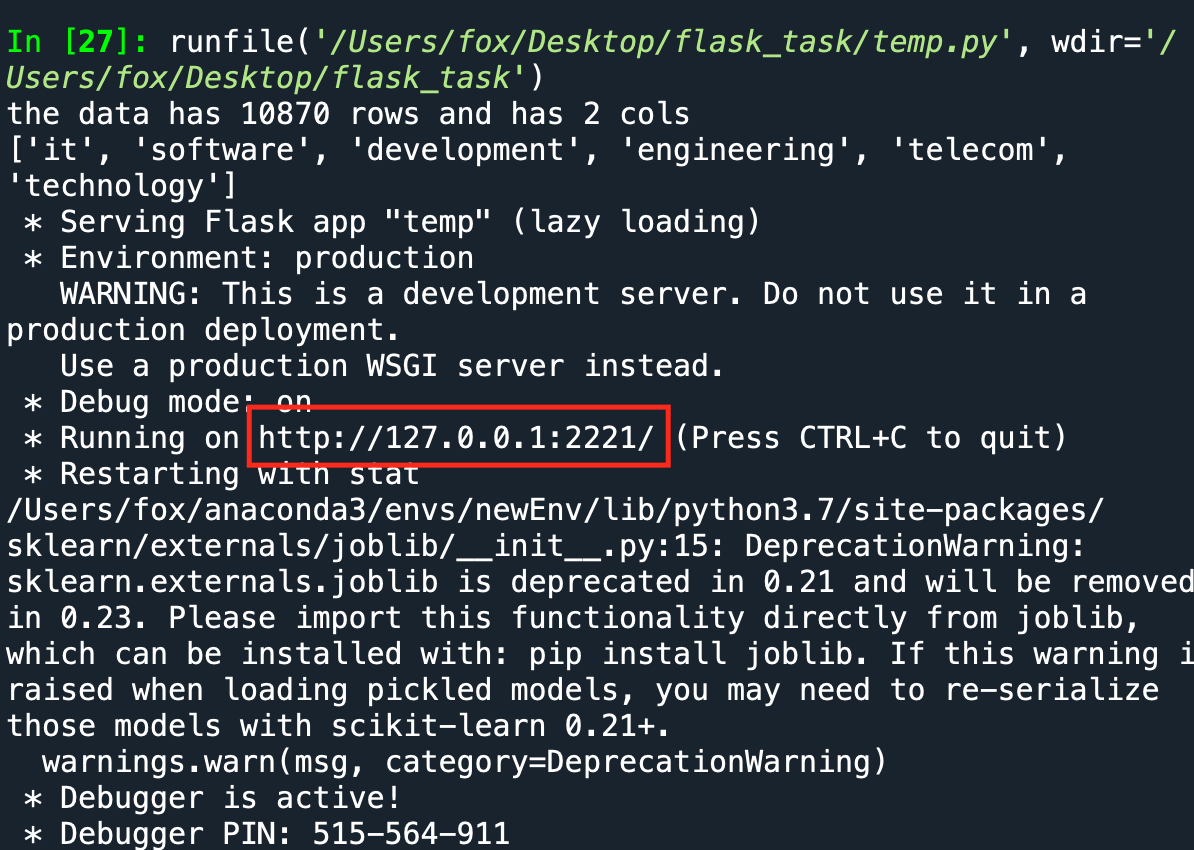

In [4]:
from IPython.display import Image
Image(filename='Screen_1.png')

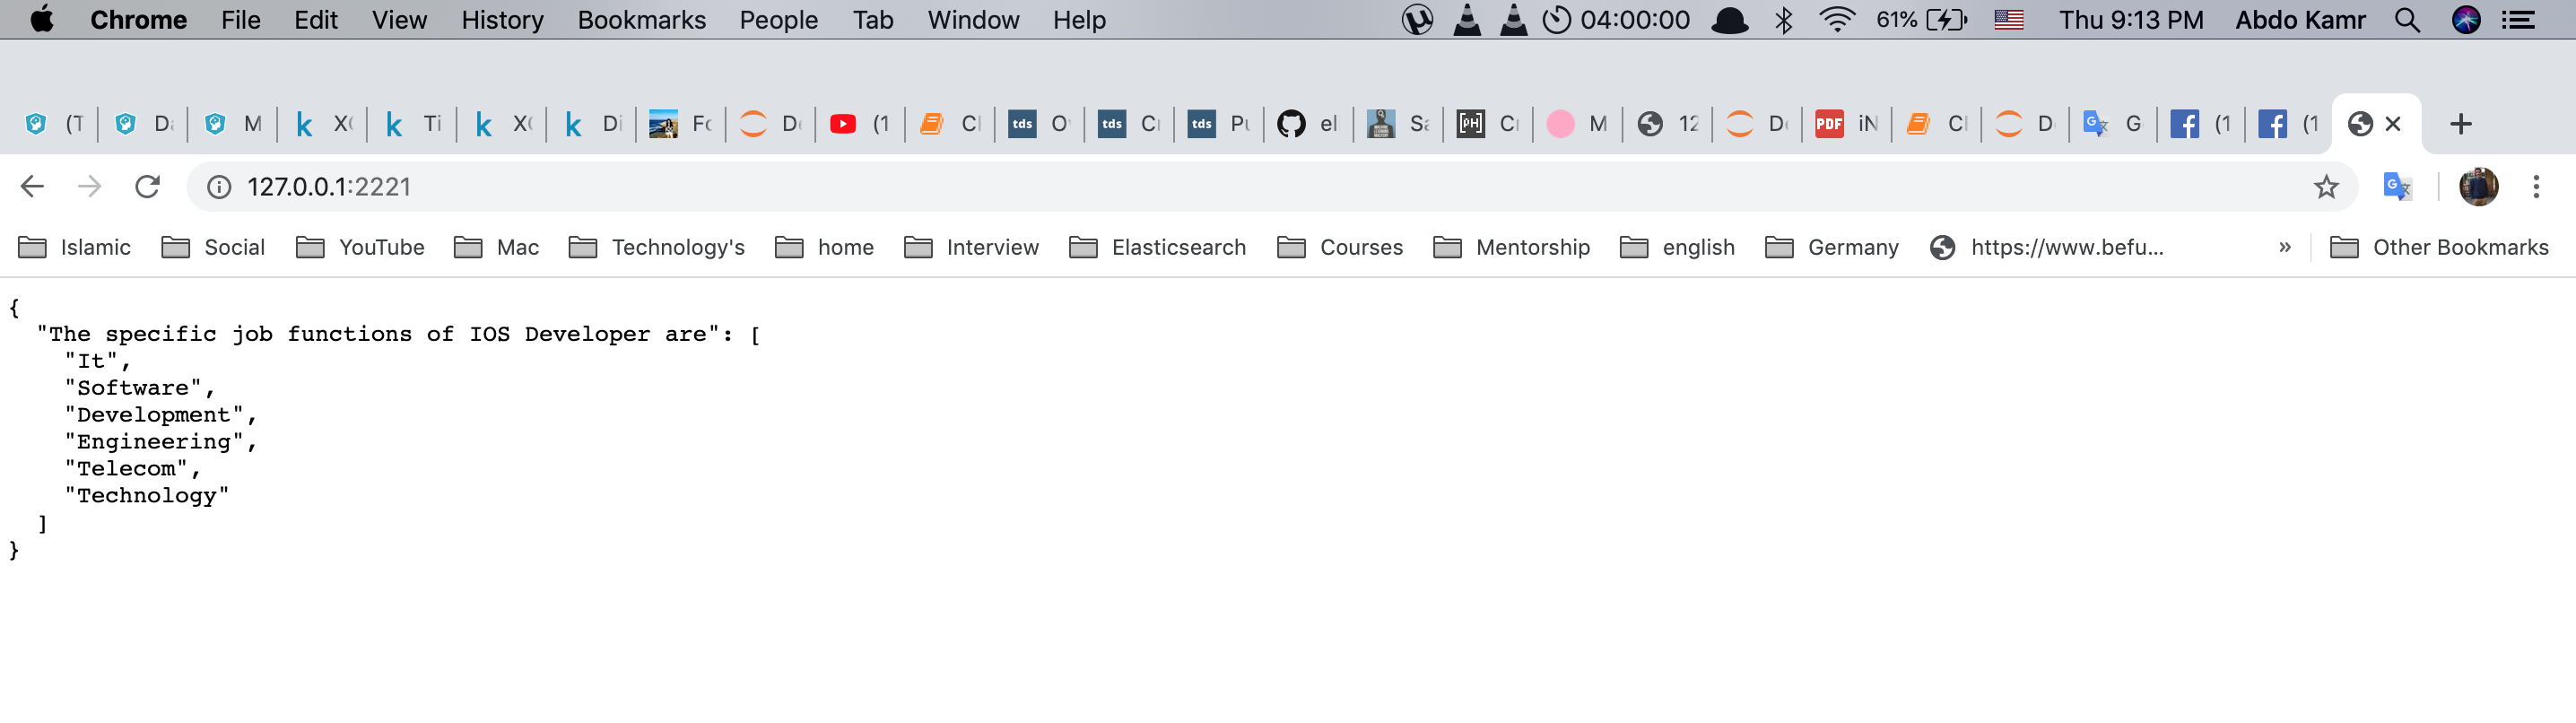

In [5]:
Image(filename='Screen_2.png')

# References


#### [Overview of Text Similarity Metrics in Python](https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50)
#### [Building a movie recommender system with Python](https://medium.com/@bkexcel2014/building-movie-recommender-systems-using-cosine-similarity-in-python-eff2d4e60d24)
#### [Building A Collaborative Filtering Recommender System with TensorFlow](https://towardsdatascience.com/building-a-collaborative-filtering-recommender-system-with-tensorflow-82e63d27b420)
#### [How to build a content-based movie recommender system with Natural Language Processing](https://towardsdatascience.com/how-to-build-from-scratch-a-content-based-movie-recommender-with-natural-language-processing-25ad400eb243)
#### [Fundamentals of Bag Of Words and TF-IDF](https://medium.com/analytics-vidhya/fundamentals-of-bag-of-words-and-tf-idf-9846d301ff22)
#### [Recommender Systems with Python — Part I: Content-Based Filtering](https://heartbeat.fritz.ai/recommender-systems-with-python-part-i-content-based-filtering-5df4940bd831)
#### [Recommender systems-How they works and their impacts](http://findoutyourfavorite.blogspot.com)
#### [Recommendation Systems : User-based Collaborative Filtering using N Nearest Neighbors](https://medium.com/sfu-big-data/recommendation-systems-user-based-collaborative-filtering-using-n-nearest-neighbors-bf7361dc24e0)
#### [Build a Recommendation Engine With Collaborative Filtering](https://realpython.com/build-recommendation-engine-collaborative-filtering/)
#### [Building a simple REST API with Python and Flask](https://medium.com/@onejohi/building-a-simple-rest-api-with-python-and-flask-b404371dc699)
#### [Create An API To Deploy Machine Learning Models Using Flask and Heroku](https://towardsdatascience.com/create-an-api-to-deploy-machine-learning-models-using-flask-and-heroku-67a011800c50)
#### [Publishing Machine Learning API with Python Flask](https://towardsdatascience.com/publishing-machine-learning-api-with-python-flask-98be46fb2440)
#### [Creating a RESTFul API With Flask [1 of 4] - Get Requests](https://www.youtube.com/watch?v=CjYKrbq8BCw&feature=youtu.be)